In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.5 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import nltk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files
import io
from spellchecker import SpellChecker
import spacy
from nltk.tokenize import word_tokenize
nlp = spacy.load("en_core_web_sm")

# Text Preprocessing

In [ ]:
uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
Saving Valid.csv to Valid.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
valid = pd.read_csv(io.BytesIO(uploaded['Valid.csv']))
test = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [ ]:
#dictionary of common contractions
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [ ]:
def contract_to_expand(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
train['text'] = train['text'].apply(lambda x:contract_to_expand(x))
valid['text'] = valid['text'].apply(lambda x:contract_to_expand(x))
test['text'] = test['text'].apply(lambda x:contract_to_expand(x))

In [ ]:
train['text'] = train['text'].apply(lambda x: x.lower())
valid['text'] = valid['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(lambda x: x.lower())
train

,text,label
0,i always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(dir-steve ...,0
2,this movie was so poorly written and directed ...,0
3,the most interesting thing about miryang (secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,this is the kind of picture john lassiter woul...,1
4996,a must see! i saw whipped at a press screening...,1
4997,nbc should be ashamed. i would not allow my ch...,0
4998,this movie is a clumsy mishmash of various gho...,0


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
train['text'] = train['text'].apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
valid['text'] = valid['text'].apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
test['text'] = test['text'].apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
train.head()

,text,label
0,i always wrote this series off as being a comp...,0
1,1st watched 1272002 3 out of 10dirsteve purce...,0
2,this movie was so poorly written and directed ...,0
3,the most interesting thing about miryang secre...,1
4,when i first read about berlin am meer i did n...,0


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train['text'] = train['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
valid['text'] = valid['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
test['text'] = test['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
train.head()

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,1st watched 1272002 3 10dirsteve purcell typic...,0
2,movie poorly written directed fell asleep 30 m...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer expect much thought rig...,0


In [ ]:
spell = SpellChecker()
train['text'] = train['text'].apply(lambda x: spell.correction(x))
valid['text'] = valid['text'].apply(lambda x: spell.correction(x))
test['text'] = test['text'].apply(lambda x: spell.correction(x))
train.head()

,text,label
0,always wrote series complete stinkfest jim bel...,0
1,1st watched 1272002 3 10dirsteve purcell typic...,0
2,movie poorly written directed fell asleep 30 m...,0
3,interesting thing miryang secret sunshine acto...,1
4,first read berlin meer expect much thought rig...,0


# Tokenizing & Lemmatizing

In [ ]:
i = 0
nltk.download('punkt')
def tokenize_lemmatize(x):
    if x == None:
        return " "
    doc = nlp(x)
    x = [token.lemma_ for token in doc]
    x = " ".join(x)
    x = word_tokenize(x)
    
    global i
    i+=1

    return x

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train['text']=train['text'].apply(tokenize_lemmatize)
valid['text']=valid['text'].apply(tokenize_lemmatize)
test['text']=test['text'].apply(tokenize_lemmatize)
train.head()

,text,label
0,"[always, write, series, complete, stinkfest, j...",0
1,"[1st, watch, 1272002, 3, 10dirsteve, purcell, ...",0
2,"[movie, poorly, write, direct, fall, asleep, 3...",0
3,"[interesting, thing, miryang, secret, sunshine...",1
4,"[first, read, berlin, meer, expect, much, thin...",0


# Frequent Words & Bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(x, n=None):
    final_text = []
    for text in x:
        temp = " ".join(text)
        final_text.append(temp)
    vec = CountVectorizer(stop_words='english').fit(final_text)
    bag_of_words = vec.transform(final_text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda final_text: final_text[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(train['text'], 25)
Unigram = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])
Unigram

,Unigram Text,Count
0,br,11317
1,movie,9689
2,film,9362
3,make,4333
4,like,4228
5,good,3764
6,time,2913
7,character,2803
8,watch,2666
9,bad,2579


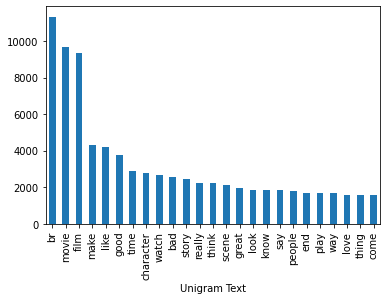

In [ ]:
Unigram.groupby('Unigram Text').sum()['Count'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
def get_top_n_bigram(x, n=None):
    final_text = []
    for text in x:
        temp = " ".join(text)
        final_text.append(temp)
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(final_text)
    bag_of_words = vec.transform(final_text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda final_text: final_text[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(train['text'], 25)
Bigram = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])
Bigram

,Bigram Text,Count
0,br br,1335
1,br film,353
2,look like,351
3,br movie,304
4,watch movie,296
5,bad movie,266
6,movie make,264
7,film make,248
8,make movie,225
9,itbr br,216


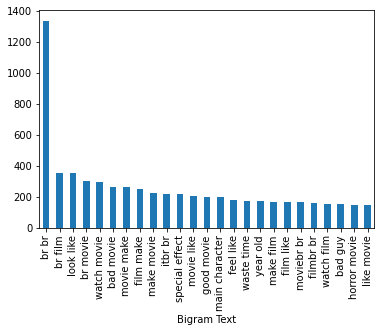

In [ ]:
Bigram.groupby('Bigram Text').sum()['Count'].sort_values(ascending=False).plot(kind='bar')

# Practical words that represent positive and negative sentiment

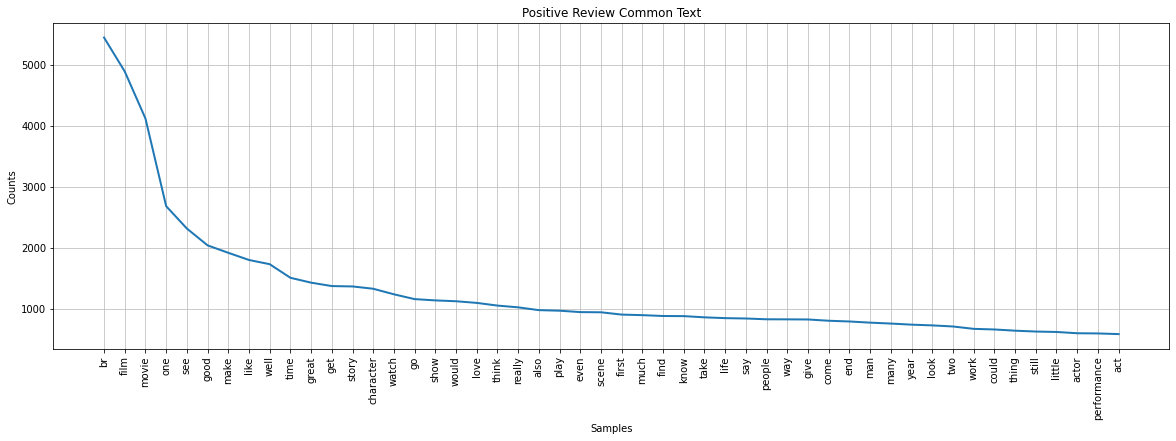

In [ ]:
from nltk.probability import FreqDist
txt = train[train['label'] == 1].text
final_text = []
for text in txt:
    temp = " ".join(text)
    final_text.append(temp)
pos_freq = FreqDist(' '.join(final_text).split(' '))
plt.figure(figsize=(20,6))
pos_freq.plot(50,cumulative=False,title='Positive Review Common Text')
plt.show()

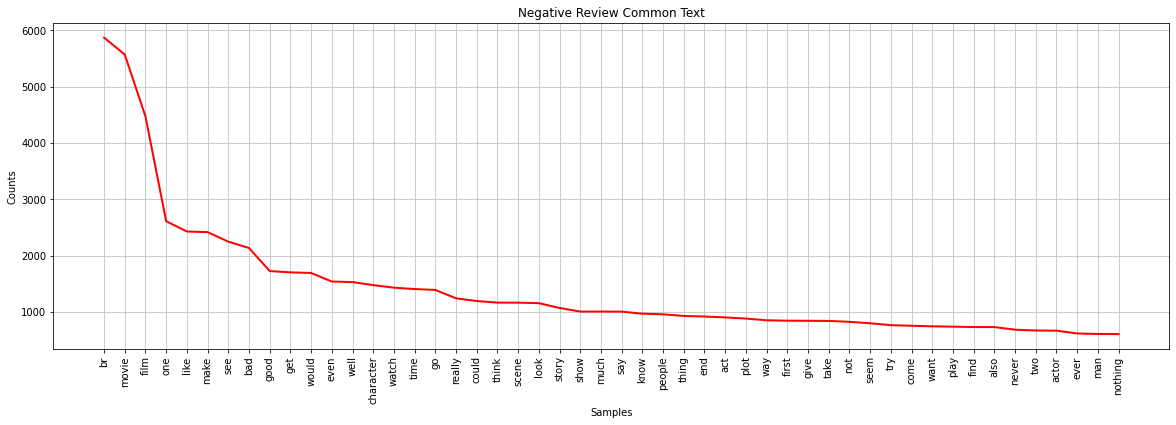

In [ ]:
txt = train[train['label'] == 0].text
final_text = []
for text in txt:
    temp = " ".join(text)
    final_text.append(temp)
neg_freq = FreqDist(' '.join(final_text).split(' '))
plt.figure(figsize=(20,6))
neg_freq.plot(50,cumulative=False,title='Negative Review Common Text',color='red')
plt.show()

# Data Preparation & Splitting

In [ ]:
x_train = train['text']
x_valid = valid['text']
x_test = test['text']
y_train = train['label']
y_valid = valid['label']
y_test = test['label']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Tokenize the sentences
tokenizer = Tokenizer()
#preparing vocabulary
tokenizer.fit_on_texts(x_train)
#converting text into integer sequences
x_train = tokenizer.texts_to_sequences(x_train)
x_valid = tokenizer.texts_to_sequences(x_valid)
x_test = tokenizer.texts_to_sequences(x_test)
#padding to prepare sequences of same length
x_train=pad_sequences(x_train,maxlen=128)
x_valid=pad_sequences(x_valid,maxlen=128)
x_test=pad_sequences(x_test,maxlen=128)

In [ ]:
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)

44120


# 15 layer LSTM

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model_lstm = Sequential()

model_lstm.add(Embedding(size_of_vocabulary,128,input_length=128, name = "Embedding"))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_1")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_2")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_3")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_4")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_5")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_6")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_7")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_8")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_9")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_10")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_11")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_12")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_13")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, return_sequences=True, name = "LSTM_14")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 64, name = "LSTM_15")) 
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(units=2))

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 128, 128)          5647360   
                                                                 
 LSTM_1 (LSTM)               (None, 128, 64)           49408     
                                                                 
 dropout_60 (Dropout)        (None, 128, 64)           0         
                                                                 
 LSTM_2 (LSTM)               (None, 128, 64)           33024     
                                                                 
 dropout_61 (Dropout)        (None, 128, 64)           0         
                                                                 
 LSTM_3 (LSTM)               (None, 128, 64)           33024     
                                                                 
 dropout_62 (Dropout)        (None, 128, 64)          

In [ ]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model_lstm.fit(x_train,y_train,batch_size=128,epochs=10,
                    validation_data=(x_valid,y_valid),verbose=1)

Epoch 1/10
40/40 [==============================] - 27s 256ms/step - loss: 0.9759 - accuracy: 0.5062 - val_loss: 0.7001 - val_accuracy: 0.4972
Epoch 2/10
40/40 [==============================] - 6s 143ms/step - loss: 0.7077 - accuracy: 0.5096 - val_loss: 0.8466 - val_accuracy: 0.7020
Epoch 3/10
40/40 [==============================] - 6s 143ms/step - loss: 0.5375 - accuracy: 0.6018 - val_loss: 0.5843 - val_accuracy: 0.5244
Epoch 4/10
40/40 [==============================] - 6s 143ms/step - loss: 0.3973 - accuracy: 0.4866 - val_loss: 2.1322 - val_accuracy: 0.4116
Epoch 5/10
40/40 [==============================] - 6s 141ms/step - loss: 0.8646 - accuracy: 0.5032 - val_loss: 0.6690 - val_accuracy: 0.4970
Epoch 6/10
40/40 [==============================] - 6s 142ms/step - loss: 0.6980 - accuracy: 0.4980 - val_loss: 0.6928 - val_accuracy: 0.5028
Epoch 7/10
40/40 [==============================] - 6s 146ms/step - loss: 0.6747 - accuracy: 0.4874 - val_loss: 5.0240 - val_accuracy: 0.6074
Epoch

In [ ]:
loss,acc = model_lstm.evaluate(x_test,y_test)
print('Test Accuracy: {}%'.format(acc*100))

1250/1250 [==============================] - 43s 31ms/step - loss: 1.0897 - accuracy: 0.4315
Test Accuracy: 43.1549996137619%


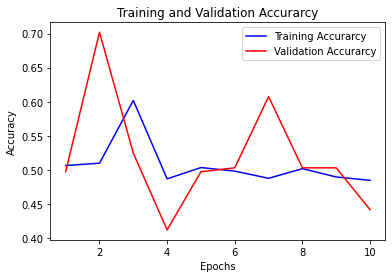

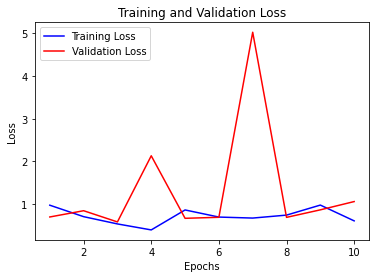

In [ ]:
import seaborn as sns

#Plotting The Graphs for Accuracy and Loss of Model1
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 20 layer BidRNN

In [ ]:
from keras.layers import Embedding, RNN, Bidirectional, Dense, Dropout

model_rnn = Sequential()

model_rnn.add(Embedding(size_of_vocabulary,128,input_length=128, name = "Embedding"))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_1"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_2"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_3"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_4"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_5"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_6"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_7"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_8"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_9"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_10"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_11"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_12"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_13"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, return_sequences=True, name = "RNN_14"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Bidirectional(LSTM(units = 64, name = "RNN_15"))) 
model_rnn.add(Dropout(0.2))

model_rnn.add(Dense(units=2))

model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 128, 128)          5647360   
                                                                 
 bidirectional (Bidirectiona  (None, 128, 128)         98816     
 l)                                                              
                                                                 
 dropout_15 (Dropout)        (None, 128, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128, 128)         98816     
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 128, 128)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128, 128)        

In [ ]:
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model_rnn.fit(x_train,y_train,batch_size=128,epochs=3,
                    validation_data=(x_valid,y_valid),verbose=1)

Epoch 1/10
40/40 [==============================] - 54s 487ms/step - loss: 1.0027 - accuracy: 0.5040 - val_loss: 0.6883 - val_accuracy: 0.5082
Epoch 2/10
40/40 [==============================] - 10s 261ms/step - loss: 0.7215 - accuracy: 0.5930 - val_loss: 0.6559 - val_accuracy: 0.5098
Epoch 3/10
40/40 [==============================] - 11s 266ms/step - loss: 0.4541 - accuracy: 0.5444 - val_loss: 0.5564 - val_accuracy: 0.6826
Epoch 4/10
40/40 [==============================] - 10s 263ms/step - loss: 0.1733 - accuracy: 0.7882 - val_loss: 1.0531 - val_accuracy: 0.7888
Epoch 5/10
40/40 [==============================] - 10s 262ms/step - loss: 0.0743 - accuracy: 0.6136 - val_loss: 2.0696 - val_accuracy: 0.4972
Epoch 6/10
40/40 [==============================] - 11s 265ms/step - loss: 0.0457 - accuracy: 0.6364 - val_loss: 2.0374 - val_accuracy: 0.5626
Epoch 7/10
40/40 [==============================] - 11s 265ms/step - loss: 0.0241 - accuracy: 0.6936 - val_loss: 2.1561 - val_accuracy: 0.5792

In [ ]:
loss,acc = model_rnn.evaluate(x_test,y_test)
print('Test Accuracy: {}%'.format(acc*100))

1250/1250 [==============================] - 93s 67ms/step - loss: 2.2533 - accuracy: 0.5918
Test Accuracy: 59.18499827384949%


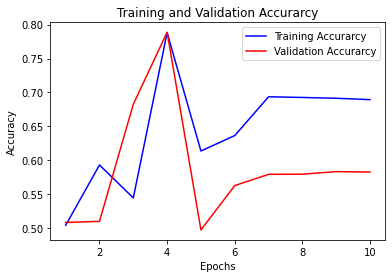

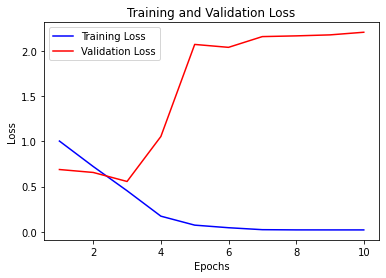

In [ ]:
#Plotting The Graphs for Accuracy and Loss of Model1
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()